In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

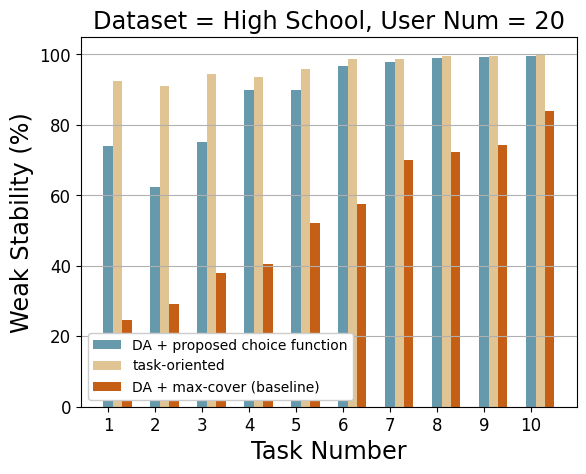

In [31]:
worker_num = 20
dataset = 'highschool'
weight = 'u'
x_labels_dict = {
    'dash':[20,40,60,80,100,120,140,160,180,200],
    'copen':[4+4*i for i in range(10)],
    'highschool':[1,2,3,4,5,6,7,8,9,10]
}

dataset_name_map= {
    'dash':'Dash',
    'copen':'Copen',
    'highschool':'High School'
}

df = pd.read_csv('./result/{}{}_result.csv'.format(dataset,weight))
df = df[df['worker']== worker_num]
# df1 = df.groupby(['method','task'])['overall-satisfactory'].agg(['mean','max','min']).reset_index()
df1 = df.groupby(['method','task'])['fairness-pairwise'].agg(['mean']).reset_index()

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover (baseline)']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(10)
# 绘制折线图
plt.figure()
# colors = ['#3B6573','#92B0A6','#D2BCAC'] 
colors =['#6599AB','#E0C494','#C55F15']
# colors = ['#0E8F9A','#50906D','#9A8C46']
# x_labels = [20,40,60,80,100,120,140,160,180,200]
x_labels = x_labels_dict[dataset]
# x_labels = [4+4*i for i in range(10)]
plt.xticks(bar_positions,x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True,axis='y')
for i,method in enumerate(methods):
    method_data = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean']*100,width = bar_width,label=labels[i],color= colors[i])

# 添加标签和图例
plt.xlabel('Task Number',fontsize='xx-large') 
plt.ylabel('Weak Stability (%)',fontsize='xx-large')
plt.title('Dataset = {}, User Num = {}'.format(dataset_name_map[dataset],worker_num),fontsize='xx-large')
plt.legend(loc='lower left',framealpha=1)

# 显示图形
# plt.show()
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/weak_stability/user{}{}{}.eps'.format(worker_num,dataset,weight))

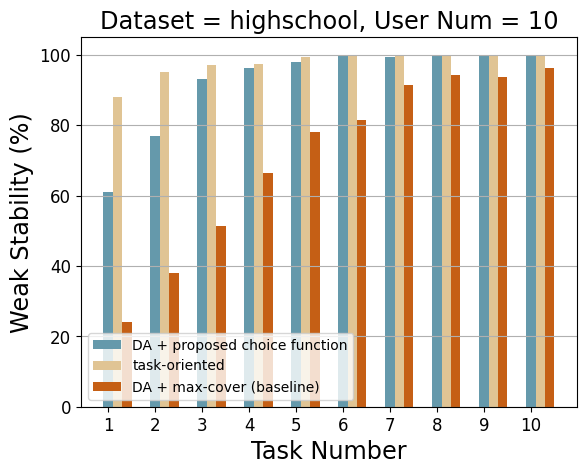

In [40]:
worker_num = 10
dataset = 'highschool'
weight = 'u'
x_labels_dict = {
    'dash':[20,40,60,80,100,120,140,160,180,200],
    'copen':[4+4*i for i in range(10)],
    'highschool':[1,2,3,4,5,6,7,8,9,10]
}



df = pd.read_csv('./result/{}{}_result.csv'.format(dataset,weight))
df = df[df['worker']== worker_num]
df1 = df.groupby(['method','task'])['overall-satisfactory'].agg(['mean','max','min']).reset_index()

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover (baseline)']
bar_width = 0.2

# 设置位置偏移，以便将直方图居中显示
bar_positions = range(10)
# 绘制折线图
plt.figure()
# colors = ['#3B6573','#92B0A6','#D2BCAC'] 
colors =['#6599AB','#E0C494','#C55F15']
# colors = ['#0E8F9A','#50906D','#9A8C46']
# x_labels = [20,40,60,80,100,120,140,160,180,200]
x_labels = x_labels_dict[dataset]
# x_labels = [4+4*i for i in range(10)]
plt.xticks(bar_positions,x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True,axis='y')
for i,method in enumerate(methods):
    method_data = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['mean']*100,width = bar_width,label=labels[i],color= colors[i])

# 添加标签和图例
plt.xlabel('Task Number',fontsize='xx-large') 
plt.ylabel('Weak Stability (%)',fontsize='xx-large')
plt.title('Dataset = {}, User Num = {}'.format(dataset,worker_num),fontsize='xx-large')
plt.legend(loc='lower left')

# 显示图形
# plt.show()
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/strong_stability/user{}{}{}.pdf'.format(worker_num,dataset,weight))

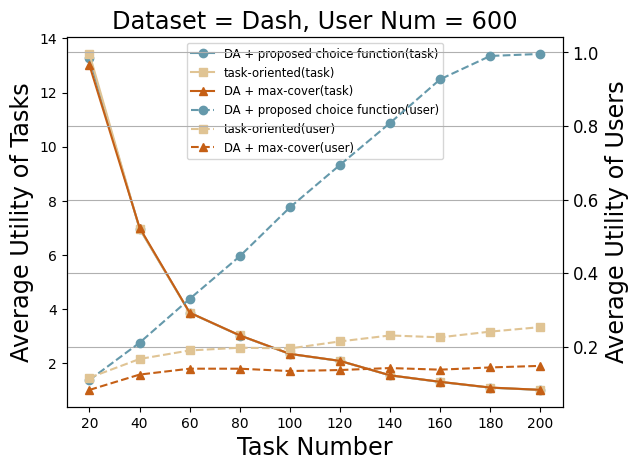

In [49]:
worker_num = 600
dataset = 'dash'
weight = 'u'
df = pd.read_csv('./result/{}{}_result.csv'.format(dataset,weight))
df = df[df['worker']== worker_num]
df1 = df.groupby(['method','task'])['avg-quality'].agg(['mean']).reset_index()
df2 = df.groupby(['method','task'])['avg-utility'].agg(['mean']).reset_index()
import matplotlib.pyplot as plt
x_labels_dict = {
    'dash':[20,40,60,80,100,120,140,160,180,200],
    'copen':[4+4*i for i in range(10)],
    'highschool':[1,2,3,4,5,6,7,8,9,10]
}
dataset_name_map= {
    'dash':'Dash',
    'copen':'Copen',
    'highschool':'High School'
}
methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover']
markers = ['o','s','^']
colors =['#6599AB','#E0C494','#C55F15']

# 绘制折线图
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 
# x_labels = [20,40,60,80,100,120,140,160,180,200]
# x_labels =[1,2,3,4,5,6,7,8,9,10]
x_labels = x_labels_dict[dataset]
plt.xticks(x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.yticks(fontsize='large')

for i,method in enumerate(methods):
    method_data1 = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))]
    method_data2 = df2[(df2['method'] == method)&(df2['task'].isin(x_labels))]
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    ax1.plot(x_labels,method_data1['mean'],marker=markers[i],label=labels[i]+'(task)',color=colors[i])
    ax2.plot(x_labels,method_data2['mean'],marker=markers[i],label=labels[i]+'(user)',color=colors[i],linestyle='--')

# 添加标签和图例
ax1.set_xlabel('Task Number',fontsize = 'xx-large')
ax1.set_ylabel('Average Utility of Tasks',fontsize = 'xx-large')
ax2.set_ylabel('Average Utility of Users',fontsize = 'xx-large')
plt.title('Dataset = {}, User Num = {}'.format(dataset_name_map[dataset], worker_num),fontsize = 'xx-large')
lines1, labels1 = ax1.get_legend_handles_labels() 
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center',fontsize='small')

# 将两个图例添加到同一个轴上
# 显示图形
plt.grid(True)
# plt.show()
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/average utility/user{}{}{}.pdf'.format(worker_num,dataset,weight))

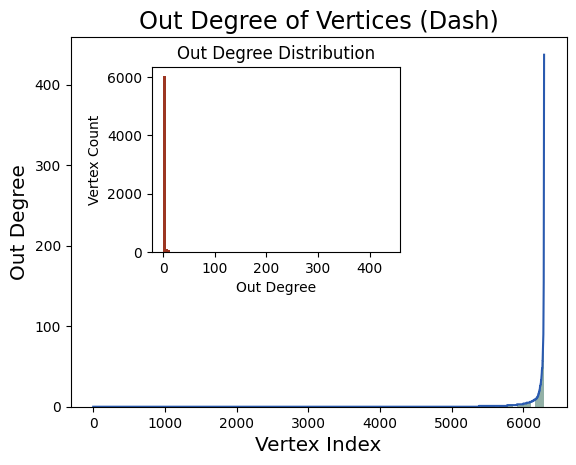

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import random
from graph.graph import read_graph
graph = 'dash'
g = read_graph('../graphs/{}.csv'.format(graph))

# sample_size = 10
# 
# # 随机选择一部分顶点进行抽样
# sampled_vertices = random.sample(range(g.vcount()), sample_size)
# out_degrees = g.outdegree(sampled_vertices)
out_degrees = g.outdegree()

# 按出度从小到大排序
sorted_indices = sorted(range(len(out_degrees)), key=lambda k: out_degrees[k])

# 获取排序后的顶点出度和编号
sorted_out_degrees = [out_degrees[i] for i in sorted_indices]
vertex_indices = range(len(sorted_out_degrees))
sorted_out_degrees = np.array(sorted_out_degrees)
# 绘制图
fig,ax = plt.subplots()
plt.plot(vertex_indices,sorted_out_degrees,color='#2A5AAF')
plt.bar(vertex_indices,sorted_out_degrees,color='#92B0A6')
plt.xlabel('Vertex Index',fontsize = 'x-large')
plt.ylabel('Out Degree',fontsize = 'x-large')
plt.title('Out Degree of Vertices (Dash)',fontsize = 'xx-large')
axins = inset_axes(ax, width="50%", height="50%", loc='lower left',
                   bbox_to_anchor=(0.15, 0.4, 1, 1), 
                   bbox_transform=ax.transAxes) 
plt.hist(sorted_out_degrees, bins=100, color='#9c3622')
plt.xlabel('Out Degree')
plt.ylabel('Vertex Count')
plt.title('Out Degree Distribution', fontsize='large')
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/{}.pdf'.format(graph))

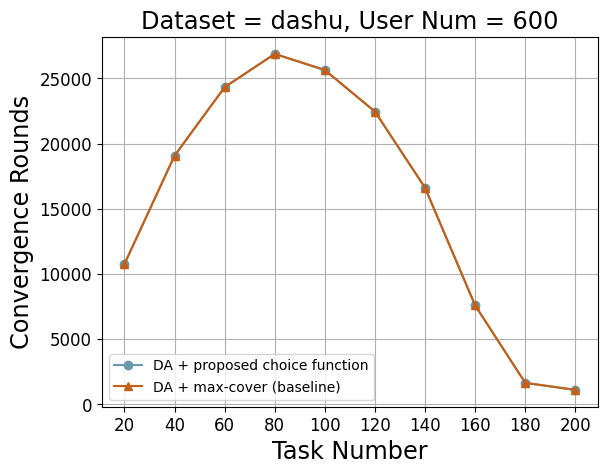

In [44]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
dataset = 'dashu'
user_num = 600
dataset_name_map= {
    'dashu':'Dash',
    'copenu':'Copen',
    'highschoolu':'High School'
}

df = pd.read_csv('./result/{}_result.csv'.format(dataset))
df1 = df.groupby(['method','task','worker'])['turn'].agg(['mean']).reset_index()
import matplotlib.pyplot as plt
x_labels_dict = {
    'dashu':[20,40,60,80,100,120,140,160,180,200],
    'copenu':[4+4*i for i in range(10)],
    'highschoolu':[1,2,3,4,5,6,7,8,9,10]
}
methods = ['budget','max-cover']
labels = ['DA + proposed choice function','DA + max-cover (baseline)']
markers = ['o','^']
colors =['#6599AB','#C55F15']

# 绘制折线图
fig, ax = plt.subplots()
x_labels = x_labels_dict[dataset]
plt.xticks(x_labels,fontsize='large')
plt.yticks(fontsize='large')

for i,method in enumerate(methods):
    method_data1 = df1[(df1['method'] == method)&(df1['task'].isin(x_labels))&(df1['worker']==user_num)]
    plt.plot(x_labels,method_data1['mean'],marker=markers[i],label=labels[i],color=colors[i])
    


# 添加标签和图例
plt.xlabel('Task Number',fontsize = 'xx-large')
plt.ylabel('Convergence Rounds',fontsize = 'xx-large')
plt.title('Dataset = {}, User Num = {}'.format(dataset,user_num),fontsize = 'xx-large')
plt.legend(loc = 'best')
# 将两个图例添加到同一个轴上
# 显示图形
plt.grid(True)
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/convergence round/{}.pdf'.format(dataset))

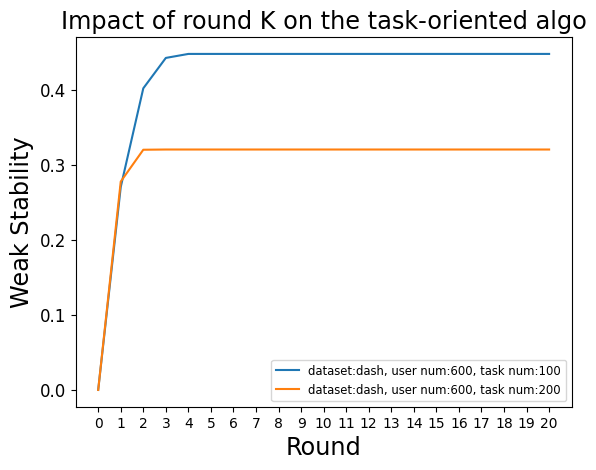

In [9]:
import math
import pandas as pd
datasets = ['dash']
K  = 21
paramap = {
    'dash': {'worker_num':600,'task_num':[100,200]}
}
df = pd.read_csv('./result/heuristic_result.csv')
df = df.groupby(['dataset','k','task'])['fairness-pairwise'].agg(['mean']).reset_index()
df = df[df['k']<K]

xs  = [i for i in range(K)]
plt.figure()
plt.xticks(xs)
plt.yticks(fontsize='large')

for dataset in datasets:
    for tasknum in paramap[dataset]['task_num']:
        data = df[(df['dataset'] == dataset) & (df['task']==tasknum)]
        plt.plot(xs,data['mean'],label='dataset:{}, user num:{}, task num:{}'.format(dataset,paramap[dataset]['worker_num'],tasknum))
plt.xlabel('Round',fontsize = 'xx-large')
plt.ylabel('Weak Stability',fontsize = 'xx-large')
plt.title('Impact of round K on the task-oriented algo',fontsize = 'xx-large')
plt.legend(loc='best',fontsize='small')

# 将两个图例添加到同一个轴上
# 显示图形
plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/impact_of_K/impactofk.pdf')

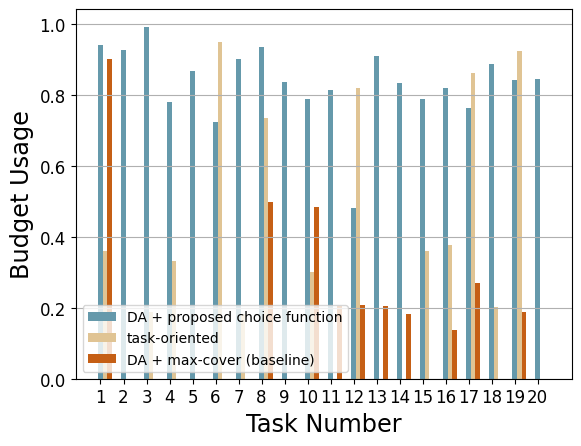

In [7]:
import math
import pandas as pd
datasets = ['dash']
df = pd.read_csv('./result/dashu_result_individual.csv')

methods = ['budget','heuristic','max-cover',]
labels = ['DA + proposed choice function','task-oriented','DA + max-cover (baseline)']
bar_width = 0.2
bar_positions = range(20)

plt.figure()
# colors = ['#3B6573','#92B0A6','#D2BCAC'] 
colors =['#6599AB','#E0C494','#C55F15']
  
# 2. 对于每个method，随机抽取20个记录  
x_labels = [1+i for i in range(20)]
# x_labels = [4+4*i for i in range(10)]
plt.xticks(bar_positions,x_labels,fontsize='large')
plt.yticks(fontsize='large')
plt.grid(True,axis='y')
for i,method in enumerate(methods):
    method_data = df[(df['method'] == method)].sample(n=20)
    current_bar_positions = [pos + i * bar_width for pos in bar_positions]
    plt.bar(current_bar_positions, method_data['cost'],width = bar_width,label=labels[i],color= colors[i])

plt.xlabel('Task Number',fontsize='xx-large') 
plt.ylabel('Budget Usage',fontsize='xx-large')
plt.title('')
plt.legend(loc='lower left')

plt.savefig('C:/Users/A/OneDrive/群智计算/研究点一/实验输出/individual_rational/dashu.pdf')
  